In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
import yaml
from mpl_toolkits.axes_grid1 import make_axes_locatable

import evolution
warnings.filterwarnings('ignore')

plots_folder = "./Figures/"

In [2]:
Mp  = 0.8
XFe = 15.
FeM = 0.
S = 0.

Planet = evolution.Rocky_Planet(Mp, XFe, FeM, S)

0.1468715883238474


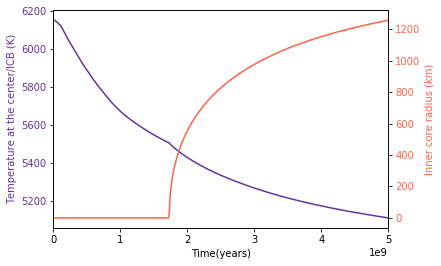

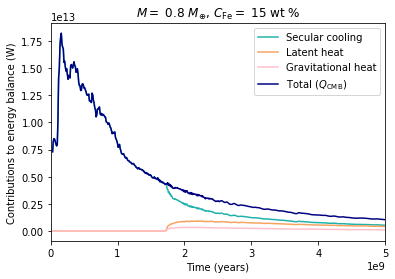

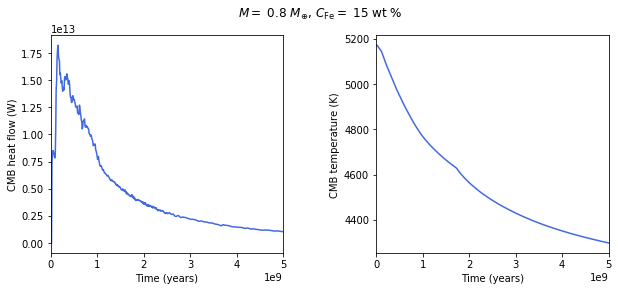

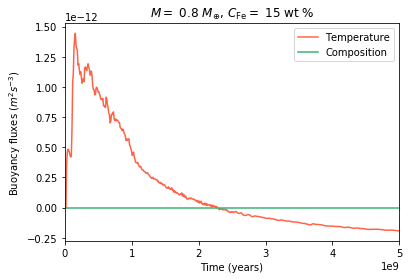

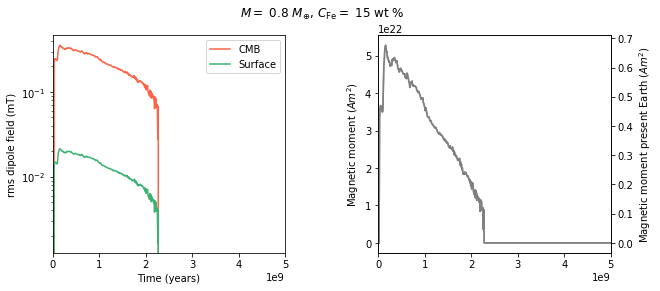

R_IC final= 1257.1328888382732


In [3]:
evo = evolution.Evolution(Planet)
evo.run()
evo.plot(plots_folder)
print ("R_IC final=",evo.r_IC[-1]/1e3)

In [4]:
# If inner core, dT_dt should be smaller as we also have latent heat --> Lena is using a larger one, meaning that her interior is losing more heat
# than what it should be --> her Q_CMB should be lower.

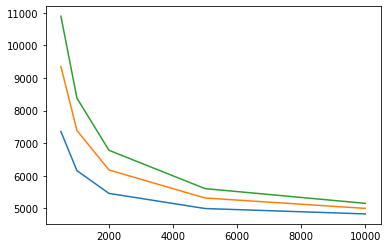

In [5]:
x = [500, 1000, 2000, 5000, 10000]
y1 = [7357, 6160, 5463, 4999, 4834]
y2 = [9350, 7390, 6180, 5322, 5004]
y3 = [10891, 8381, 6783, 5609,  5158]
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

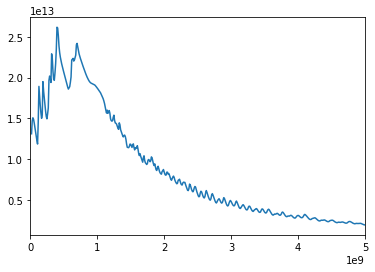

In [6]:
import pandas as pd
qcmb_ev = pd.read_csv("./Q_CMB/res_t_HS_Tm_Tb_qs_qc_M{:02d}_Fe{:02d}_#FeM{:02d}.res".format(int(10*Mp),int(XFe), int(FeM)), skipinitialspace=True, sep=" ", index_col=False,skiprows=[0])
qcmb_ev.columns = ["time", "H_rad", "T_um","T_cmb","q_surf","qcmb"]
time_vector = qcmb_ev["time"] *1e6
qcmb = qcmb_ev["qcmb"]

plt.plot(time_vector,qcmb*evo.planet.r_OC**2 * 4 * np.pi)
plt.xlim([0,5e9])
plt.show()

## Run cases for all Mp, all XFe, and a set amount of FeM (LE=0)

In [4]:
Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.]
Fe = [15,25,35,45,55,65,75]
Fe_mantle = [0.00,10.,20.]
S = 0.0

M, F = np.meshgrid(Masses, Fe)
r_IC_end = np.zeros((len(Fe),len(Masses)*len(Fe_mantle)))
r_IC_beginning = np.zeros_like(r_IC_end)
MF_lifetime = np.zeros_like(r_IC_end)
Q_CMB_end = np.zeros_like(r_IC_end)
r_OC = np.zeros_like(r_IC_end)

for m,iron_mantle in enumerate(Fe_mantle):
    #print (m)
    for i, mass in enumerate(Masses):
        for j,iron in enumerate(Fe):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()
            #evo.plot(plots_folder)
            
            r_IC_beginning[j,i+m*len(Masses)] = evo.planet.r_IC_0/1e3 
            r_IC_end[j,i+m*len(Masses)] = evo.r_IC[-1]/1e3      
            r_OC[j,i+m*len(Masses)] = evo.planet.r_OC/1e3
            MF_lifetime[j,i+m*len(Masses)] = evo.t_mf           
            Q_CMB_end[j,i+m*len(Masses)] = evo.Q_CMB[-1]        

0.8 15 0.0 0.0
0.1468715883238474
0.8 25 0.0 0.0
11.279734399442532
0.8 35 0.0 0.0
21.79074507117457
0.8 45 0.0 0.0
0.8 55 0.0 0.0
0.8 65 0.0 0.0
0.8 75 0.0 0.0
0.9 15 0.0 0.0
3.2622881960796803
0.9 25 0.0 0.0
4.172470832677391
0.9 35 0.0 0.0
25.27180350141407
0.9 45 0.0 0.0
0.9 55 0.0 0.0
0.9 65 0.0 0.0
0.9 75 0.0 0.0
1.0 15 0.0 0.0
5.800641563136196
1.0 25 0.0 0.0
0.8455595341865774
1.0 35 0.0 0.0
7.177765646832995
1.0 45 0.0 0.0
1.0 55 0.0 0.0
1.0 65 0.0 0.0
1.0 75 0.0 0.0
1.1 15 0.0 0.0
0.9568784630237133
1.1 25 0.0 0.0
8.228428575494945
1.1 35 0.0 0.0
5.820746933540249
1.1 45 0.0 0.0
1.1 55 0.0 0.0
1.1 65 0.0 0.0
1.1 75 0.0 0.0
1.2 15 0.0 0.0
7.046277131024908
1.2 25 0.0 0.0
5.246784271987053
1.2 35 0.0 0.0
27.278031821330842
1.2 45 0.0 0.0
1.2 55 0.0 0.0
1.2 65 0.0 0.0
1.2 75 0.0 0.0
1.3 15 0.0 0.0
4.084431947182566
1.3 25 0.0 0.0
0.20043957225152553
1.3 35 0.0 0.0
6.20397235931614
1.3 45 0.0 0.0
1.3 55 0.0 0.0
1.3 65 0.0 0.0
1.3 75 0.0 0.0
1.4 15 0.0 0.0
4.751124005631937
1.4 25

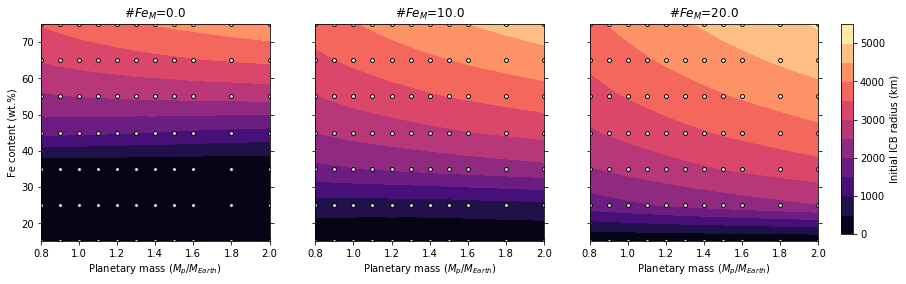

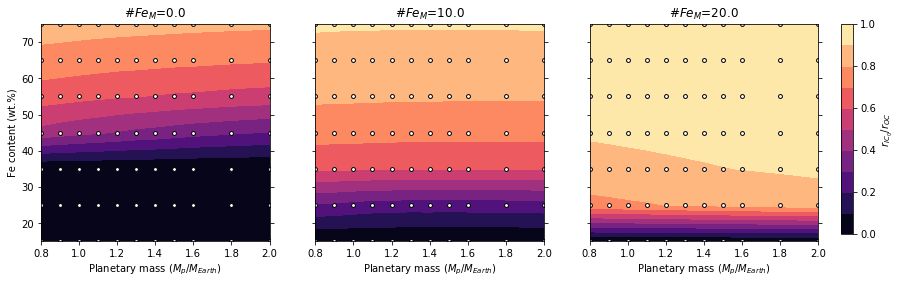

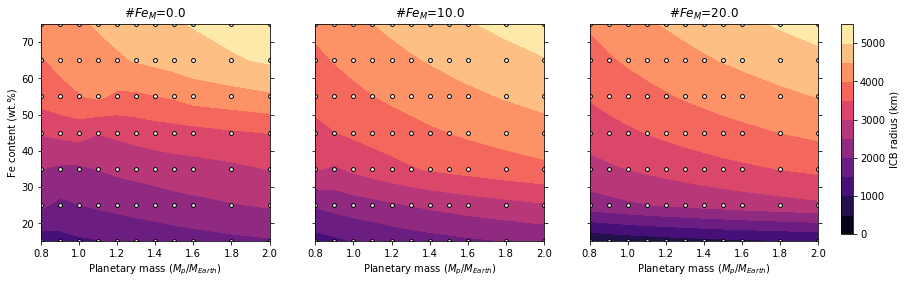

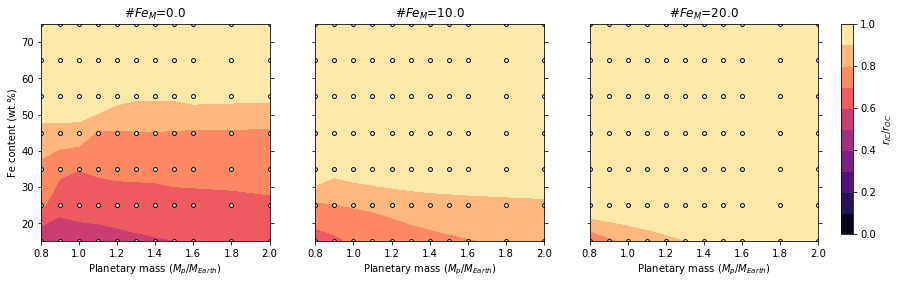

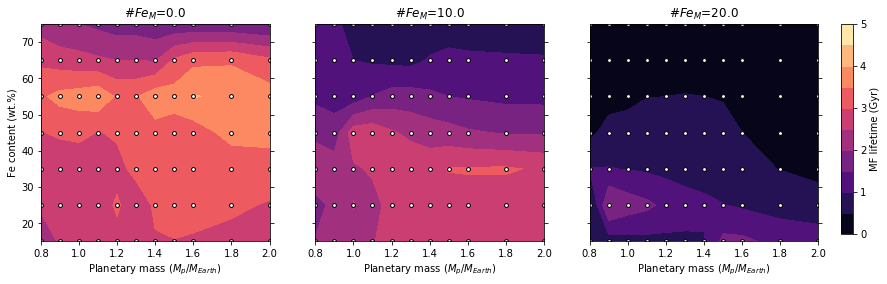

In [21]:
fig, ax = plt.subplots(1, len(Fe_mantle), figsize=[16,4],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)
size = 15

levels_rIC = np.linspace(0, 5500, 12)
for i in range(len(Fe_mantle)):
    sc = ax[i].contourf(M,F,r_IC_beginning[:,i*len(Masses):len(Masses)*(i+1)],levels_rIC, cmap = plt.cm.magma) 
    for a in range(len(Masses)):
        for b in range(len(Fe)):
            ax[i].scatter(Masses[a],Fe[b],s=size,color='white',edgecolors='k')
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Fe content (wt.%)")
    ax[i].set_title('#$Fe_M$={}'.format(Fe_mantle[i]))
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
    ax[i].set_xlim([0.8,2.0])
    ax[i].set_ylim([15,75])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("Initial ICB radius (km)")
plt.savefig(plots_folder +"r_IC0_FeM.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Fe_mantle), figsize=[16,4],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_ICMF = np.linspace(0, 1, 11)
for i in range(len(Fe_mantle)):
    sc = ax[i].contourf(M,F,r_IC_beginning[:,i*len(Masses):len(Masses)*(i+1)]/r_OC[:,i*len(Masses):len(Masses)*(i+1)],levels_ICMF, cmap = plt.cm.magma)  
    for a in range(len(Masses)):
        for b in range(len(Fe)):
            ax[i].scatter(Masses[a],Fe[b],s=size,color='white',edgecolors='k')
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Fe content (wt.%)")
    ax[i].set_title('#$Fe_M$={}'.format(Fe_mantle[i]))
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
    ax[i].set_xlim([0.8,2.0])
    ax[i].set_ylim([15,75])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("$r_{IC_{0}}$/$r_{OC}$")
plt.savefig(plots_folder +"ICMF_0_FeM.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Fe_mantle), figsize=[16,4],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_rIC = np.linspace(0, 5500, 12)
for i in range(len(Fe_mantle)):
    sc = ax[i].contourf(M,F,r_IC_end[:,i*len(Masses):len(Masses)*(i+1)],levels_rIC, cmap = plt.cm.magma)  
    for a in range(len(Masses)):
        for b in range(len(Fe)):
            ax[i].scatter(Masses[a],Fe[b],s=size,color='white',edgecolors='k')
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Fe content (wt.%)")
    ax[i].set_title('#$Fe_M$={}'.format(Fe_mantle[i]))
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
    ax[i].set_xlim([0.8,2.0])
    ax[i].set_ylim([15,75])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("ICB radius (km)")
plt.savefig(plots_folder +"r_IC_FeM.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Fe_mantle), figsize=[16,4],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_ICMF = np.linspace(0, 1, 11)
for i in range(len(Fe_mantle)):
    sc = ax[i].contourf(M,F,r_IC_end[:,i*len(Masses):len(Masses)*(i+1)]/r_OC[:,i*len(Masses):len(Masses)*(i+1)],levels_ICMF, cmap = plt.cm.magma)  
    for a in range(len(Masses)):
        for b in range(len(Fe)):
            ax[i].scatter(Masses[a],Fe[b],s=size,color='white',edgecolors='k')
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Fe content (wt.%)")
    ax[i].set_title('#$Fe_M$={}'.format(Fe_mantle[i]))
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlim([0.8,2.0])
    ax[i].set_ylim([15,75])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("$r_{IC}$/$r_{OC}$")
plt.savefig(plots_folder +"ICMF_FeM.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Fe_mantle), figsize=[16,4],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_MF = np.linspace(0, 5, 11)
for i in range(len(Fe_mantle)):
    sc = ax[i].contourf(M,F,MF_lifetime[:,i*len(Masses):len(Masses)*(i+1)],levels_MF, cmap = plt.cm.magma)  
    for a in range(len(Masses)):
        for b in range(len(Fe)):
            ax[i].scatter(Masses[a],Fe[b],s=size,c='white',edgecolors='k')
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Fe content (wt.%)")
    ax[i].set_title('#$Fe_M$={}'.format(Fe_mantle[i]))
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlim([0.8,2.0])
    ax[i].set_ylim([15,75])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("MF lifetime (Gyr)")
plt.savefig(plots_folder +"MF_lifetime_FeM.pdf", bbox_inches="tight")
plt.show()

In [12]:
Fe_mantle = [0.,5.,10.,15.,20.]
Masses = [0.8, 1.0, 1.5, 2.]
Fe = 45
LE = [0,0.05]

TL0 = np.zeros((len(Fe_mantle),len(Masses)*len(LE)),dtype=np.float64)
T0 = np.zeros((len(Fe_mantle),len(Masses)*len(LE)),dtype=np.float64)

for m, light_elements in enumerate(LE):
    for i, mass in enumerate(Masses):
        for j,iron_mantle in enumerate(Fe_mantle):
            Mp = mass
            XFe = Fe
            S = light_elements
            FeM = iron_mantle
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)

            evo.run()

            TL0[j,i+m*len(Masses)] = evo.planet.TL0 
            T0[j,i+m*len(Masses)] = evo.planet.T0

0.8 45 0.0 0
0.8 45 5.0 0
0.8 45 10.0 0
0.8 45 15.0 0
0.8 45 20.0 0
1.0 45 0.0 0
1.0 45 5.0 0
1.0 45 10.0 0
1.0 45 15.0 0
1.0 45 20.0 0
1.5 45 0.0 0
1.5 45 5.0 0
1.5 45 10.0 0
1.5 45 15.0 0
1.5 45 20.0 0
2.0 45 0.0 0
2.0 45 5.0 0
2.0 45 10.0 0
2.0 45 15.0 0
2.0 45 20.0 0
0.8 45 0.0 0.05
0.8 45 5.0 0.05
0.8 45 10.0 0.05
0.8 45 15.0 0.05
0.8 45 20.0 0.05
1.0 45 0.0 0.05
1.0 45 5.0 0.05
1.0 45 10.0 0.05
1.0 45 15.0 0.05
1.0 45 20.0 0.05
1.5 45 0.0 0.05
1.5 45 5.0 0.05
1.5 45 10.0 0.05
1.5 45 15.0 0.05
1.5 45 20.0 0.05
2.0 45 0.0 0.05
2.0 45 5.0 0.05
2.0 45 10.0 0.05
2.0 45 15.0 0.05
2.0 45 20.0 0.05


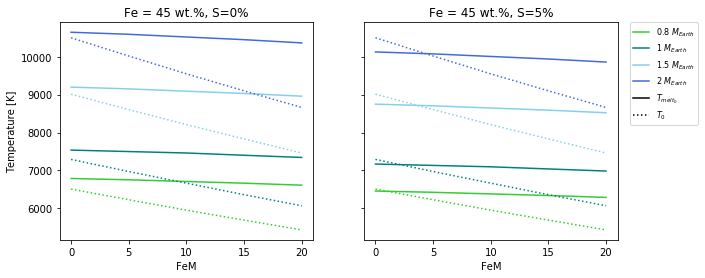

In [13]:
label=["0.8 $M_{Earth}$",'1 $M_{Earth}$','1.5 $M_{Earth}$','2 $M_{Earth}$']
color=["limegreen","teal","skyblue","royalblue"]
fig, ax = plt.subplots(1, 2, figsize=[10,4],sharey=True)
for i in range(len(Masses)):
    ax[0].plot(Fe_mantle,TL0[:,i],color=color[i])
    ax[0].plot(Fe_mantle,T0[:,i],linestyle=':',color=color[i])
    ax[1].plot(Fe_mantle,TL0[:,i+len(Masses)],label=label[i],color=color[i])
    ax[1].plot(Fe_mantle,T0[:,i+len(Masses)],linestyle=':',color=color[i])

ax[0].set_xlabel('FeM')
ax[1].set_xlabel('FeM')
ax[0].set_ylabel('Temperature [K]')
ax[0].set_title('Fe = 45 wt.%, S=0%')
ax[1].set_title('Fe = 45 wt.%, S=5%')
handles, labels = ax[1].get_legend_handles_labels()
display = (0,1,2,3,4)
Tmelt0 = plt.Line2D((0,1),(0,0), color='k')
T0 = plt.Line2D((0,1),(0,0), color='k',marker='',linestyle=':')
ax[1].legend([handle for i,handle in enumerate(handles) if i in display]+[Tmelt0,T0],
          [label for i,label in enumerate(labels) if i in display]+['$T_{melt_{0}}$','$T_{0}$'],bbox_to_anchor=(1.05, 1),borderaxespad=0.,fontsize=8)
plt.savefig(plots_folder +"T0_Tmelt.pdf", bbox_inches="tight")
plt.show()

## Run cases for all XFe, all FeM, and a set amount of Mp (LE=0)

In [14]:
Masses_ = [0.8, 1.0, 1.5, 2.]
Fe = [15,25,35,45,55,65,75]
Fe_mantle_ = [0.,5.,10.,15.,20.]
S = 0.0

FE, FM = np.meshgrid(Fe,Fe_mantle_)
r_IC_end_M = np.zeros((len(Fe_mantle_),len(Masses_)*len(Fe)))
r_IC_beginning_M = np.zeros_like(r_IC_end_M)
MF_lifetime_M = np.zeros_like(r_IC_end_M)
Q_CMB_end_M = np.zeros_like(r_IC_end_M)
r_OC_M = np.zeros_like(r_IC_end_M)

for m,mass in enumerate(Masses_):
    for i, iron in enumerate(Fe):
        for j,iron_mantle in enumerate(Fe_mantle_):
            Mp = mass
            XFe = iron
            FeM = iron_mantle
            S = S
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)
            evo.run()
            r_IC_beginning_M[j,i+m*len(Fe)] = evo.planet.r_IC_0/1e3 
            r_IC_end_M[j,i+m*len(Fe)] = evo.r_IC[-1]/1e3      
            r_OC_M[j,i+m*len(Fe)] = evo.planet.r_OC/1e3
            MF_lifetime_M[j,i+m*len(Fe)] = evo.t_mf           
            Q_CMB_end_M[j,i+m*len(Fe)] = evo.Q_CMB[-1] 

0.8 15 0.0 0.0
0.8 15 5.0 0.0
0.8 15 10.0 0.0
0.8 15 15.0 0.0
0.8 15 20.0 0.0
0.8 25 0.0 0.0
0.8 25 5.0 0.0
0.8 25 10.0 0.0
0.8 25 15.0 0.0
0.8 25 20.0 0.0
0.8 35 0.0 0.0
0.8 35 5.0 0.0
0.8 35 10.0 0.0
0.8 35 15.0 0.0
0.8 35 20.0 0.0
0.8 45 0.0 0.0
0.8 45 5.0 0.0
0.8 45 10.0 0.0
0.8 45 15.0 0.0
0.8 45 20.0 0.0
0.8 55 0.0 0.0
0.8 55 5.0 0.0
0.8 55 10.0 0.0
0.8 55 15.0 0.0
0.8 55 20.0 0.0
0.8 65 0.0 0.0
0.8 65 5.0 0.0
0.8 65 10.0 0.0
0.8 65 15.0 0.0
0.8 65 20.0 0.0
0.8 75 0.0 0.0
0.8 75 5.0 0.0
0.8 75 10.0 0.0
0.8 75 15.0 0.0
0.8 75 20.0 0.0
1.0 15 0.0 0.0
1.0 15 5.0 0.0
1.0 15 10.0 0.0
1.0 15 15.0 0.0
1.0 15 20.0 0.0
1.0 25 0.0 0.0
1.0 25 5.0 0.0
1.0 25 10.0 0.0
1.0 25 15.0 0.0
1.0 25 20.0 0.0
1.0 35 0.0 0.0
1.0 35 5.0 0.0
1.0 35 10.0 0.0
1.0 35 15.0 0.0
1.0 35 20.0 0.0
1.0 45 0.0 0.0
1.0 45 5.0 0.0
1.0 45 10.0 0.0
1.0 45 15.0 0.0
1.0 45 20.0 0.0
1.0 55 0.0 0.0
1.0 55 5.0 0.0
1.0 55 10.0 0.0
1.0 55 15.0 0.0
1.0 55 20.0 0.0
1.0 65 0.0 0.0
1.0 65 5.0 0.0
1.0 65 10.0 0.0
1.0 65 15.0 0.0
1.

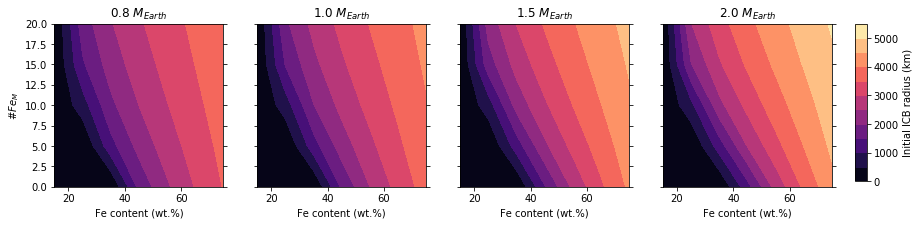

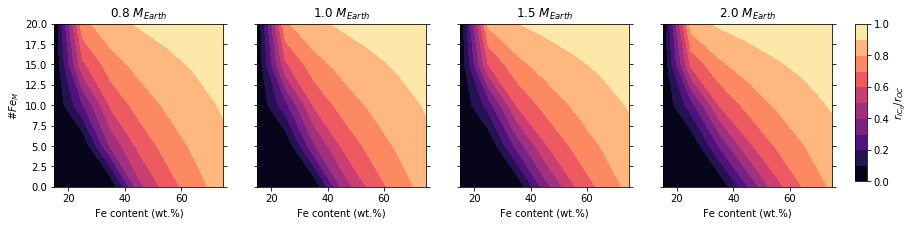

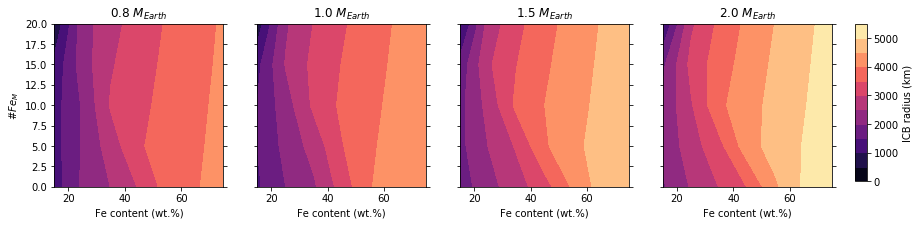

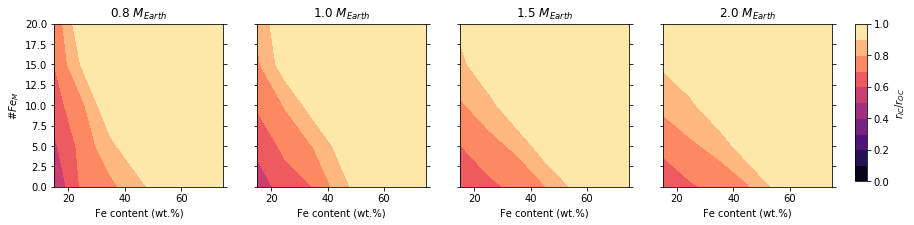

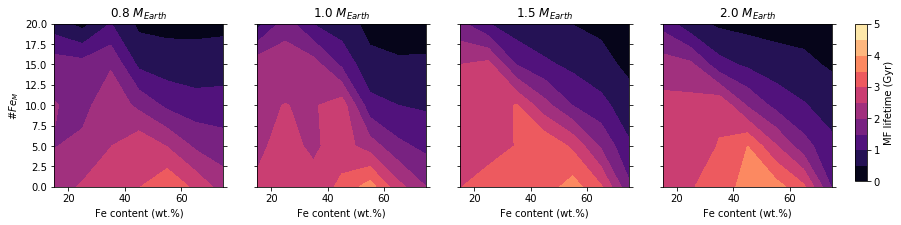

In [16]:
fig, ax = plt.subplots(1, len(Masses_), figsize=[16,3],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_rIC = np.linspace(0, 5500, 12)
for i in range(len(Masses_)):
    sc = ax[i].contourf(FE,FM,r_IC_beginning_M[:,i*len(Fe):len(Fe)*(i+1)],levels_rIC, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("#$Fe_{M}$")
    ax[i].set_title("{:.1f}".format(Masses_[i]) + r" $M_{Earth}$")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Fe content (wt.%)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("Initial ICB radius (km)")
plt.savefig(plots_folder +"r_IC0_Mp_NEW.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Masses_), figsize=[16,3],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_ICMF = np.linspace(0, 1, 11)
for i in range(len(Masses_)):
    sc = ax[i].contourf(FE,FM,r_IC_beginning_M[:,i*len(Fe):len(Fe)*(i+1)]/r_OC_M[:,i*len(Fe):len(Fe)*(i+1)],levels_ICMF, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
         ax[i].set_ylabel("#$Fe_{M}$")
    ax[i].set_title("{:.1f}".format(Masses_[i]) + r" $M_{Earth}$")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Fe content (wt.%)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("$r_{IC_{0}}$/$r_{OC}$")
plt.savefig(plots_folder +"ICMF0_Mp_NEW.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Masses_), figsize=[16,3],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_rIC = np.linspace(0, 5500, 12)
for i in range(len(Masses_)):
    sc = ax[i].contourf(FE,FM,r_IC_end_M[:,i*len(Fe):len(Fe)*(i+1)],levels_rIC, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("#$Fe_{M}$")
    ax[i].set_title("{:.1f}".format(Masses_[i]) + r" $M_{Earth}$")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Fe content (wt.%)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("ICB radius (km)")
plt.savefig(plots_folder +"r_IC_Mp_NEW.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Masses_), figsize=[16,3],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_ICMF = np.linspace(0, 1, 11)
for i in range(len(Masses_)):
    sc = ax[i].contourf(FE,FM,r_IC_end_M[:,i*len(Fe):len(Fe)*(i+1)]/r_OC_M[:,i*len(Fe):len(Fe)*(i+1)],levels_ICMF, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
         ax[i].set_ylabel("#$Fe_{M}$")
    ax[i].set_title("{:.1f}".format(Masses_[i]) + r" $M_{Earth}$")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Fe content (wt.%)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("$r_{IC}$/$r_{OC}$")
plt.savefig(plots_folder +"ICMF_Mp_NEW.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Masses_), figsize=[16,3],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_MF = np.linspace(0, 5, 11)
for i in range(len(Masses_)):
    sc = ax[i].contourf(FE,FM,MF_lifetime_M[:,i*len(Fe):len(Fe)*(i+1)],levels_MF, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("#$Fe_{M}$")
    ax[i].set_title("{:.1f}".format(Masses_[i]) + r" $M_{Earth}$")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Fe content (wt.%)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("MF lifetime (Gyr)")
plt.savefig(plots_folder +"MF_lifetime_Mp_NEW.pdf", bbox_inches="tight")
plt.show()

## Run cases for all Mp, all XFe, and a set amount of light elements (FeM=0)

In [17]:
Masses_S = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.]
Fe_S = [15,25,35,45,55,65,75]
FeM_S = 0.0
LE_S = [0.0,0.05,0.1]

M_S, F_S = np.meshgrid(Masses_S, Fe_S)
r_IC_end_S = np.zeros((len(Fe_S),len(Masses_S)*len(LE_S)))
r_IC_beginning_S = np.zeros_like(r_IC_end_S)
MF_lifetime_S = np.zeros_like(r_IC_end_S)
Q_CMB_end_S = np.zeros_like(r_IC_end_S)
r_OC_S = np.zeros_like(r_IC_end_S)

for m,light_elements in enumerate(LE_S):
    for i, mass in enumerate(Masses_S):
        for j,iron in enumerate(Fe_S):
            Mp = mass
            XFe = iron
            S = light_elements
            FeM = FeM_S
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)
            evo.run()
            
            r_IC_beginning_S[j,i+m*len(Masses_S)] = evo.planet.r_IC_0/1e3
            r_IC_end_S[j,i+m*len(Masses_S)] = evo.r_IC[-1]/1e3
            print (r_IC_end_S[j,i+m*len(Masses_S)])
            if r_IC_end_S[j,i+m*len(Masses_S)]<0:
                break
            r_OC_S[j,i+m*len(Masses_S)] = evo.planet.r_OC/1e3
            MF_lifetime_S[j,i+m*len(Masses_S)] = evo.t_mf           
            Q_CMB_end_S[j,i+m*len(Masses_S)] = evo.Q_CMB[-1]        

1257.67307355602
2093.9741544769354
2508.73653113412
3039.0836464282474
3711.508792743324
3964.9190590686007
4162.706201979399
1341.8190278711254
1895.1722066958187
2423.065310043527
3126.991914082096
3868.478526207202
4101.0300452125
4305.5254209333
1423.148850894436
1993.2738069992806
2415.314653974668
3206.5302492969136
3978.112201758414
4220.5331447157005
4431.087166497499
1472.5175398166264
2072.7760382269144
2515.504872698254
3026.328294317232
4089.0385407185613
4330.413393379899
4546.6066794593
1550.8184875955424
2134.5722214986918
2603.168446248744
3097.2065006020966
3911.7929146328634
4432.0034221645
4659.5591144126
1627.8967796613524
2201.2352564425555
2655.21491416046
3187.823263662845
3917.228006055558
4533.0828228229
4759.1709852513
1689.279859160657
2246.919326233116
2719.4120401663595
3259.949933755873
3983.2467120045562
4621.7224886658
4859.0277812315
1743.2243476451126
2321.858241208869
2778.736738727922
3299.0234531663946
4067.0433515831396
4705.0327103784
4947.253004

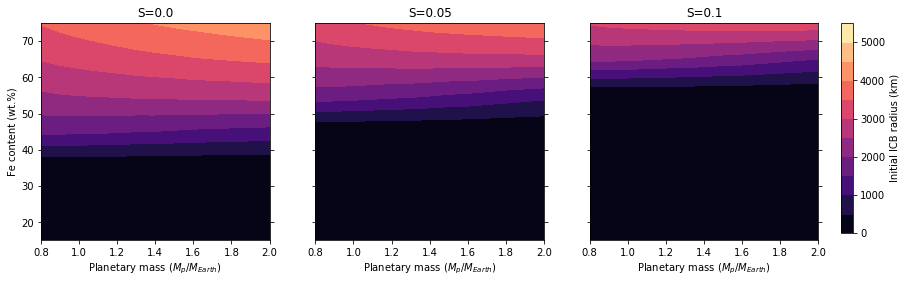

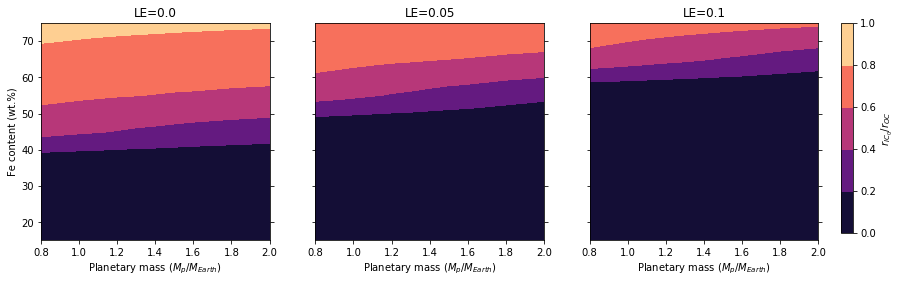

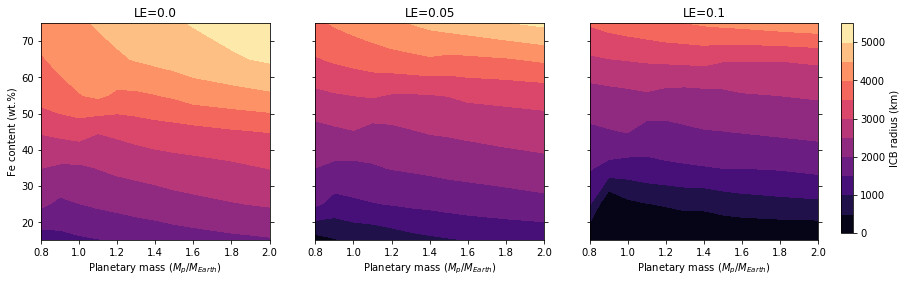

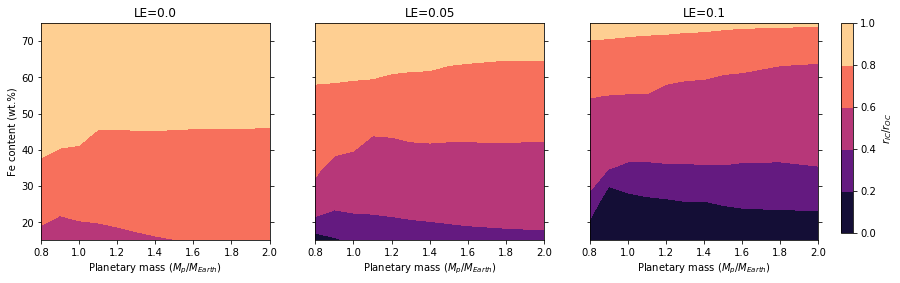

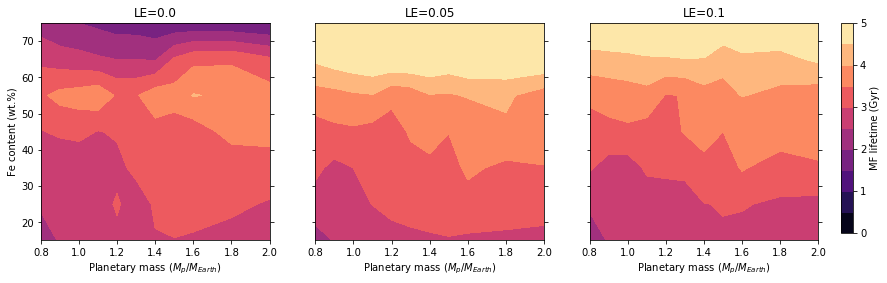

In [18]:
fig, ax = plt.subplots(1, len(LE_S), figsize=[16,4],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_rIC = np.linspace(0, 5500, 12)
for i in range(len(LE_S)):
    sc = ax[i].contourf(M_S,F_S,r_IC_beginning_S[:,i*len(Masses_S):len(Masses_S)*(i+1)],levels_rIC, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Fe content (wt.%)")
    ax[i].set_title('S={}'.format(LE_S[i]))
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("Initial ICB radius (km)")
plt.savefig(plots_folder +"r_IC0_FeM_S_NEW.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(LE_S), figsize=[16,4],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_ICMF = np.linspace(0, 1, 6)
for i in range(len(LE_S)):
    sc = ax[i].contourf(M_S,F_S,r_IC_beginning_S[:,i*len(Masses_S):len(Masses_S)*(i+1)]/r_OC_S[:,i*len(Masses_S):len(Masses_S)*(i+1)],levels_ICMF, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Fe content (wt.%)")
    ax[i].set_title('LE={}'.format(LE_S[i]))
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("$r_{IC_{0}}$/$r_{OC}$")
plt.savefig(plots_folder +"ICMF_0_S_NEW.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(LE_S), figsize=[16,4],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_rIC = np.linspace(0, 5500, 12)
for i in range(len(LE_S)):
    sc = ax[i].contourf(M_S,F_S,r_IC_end_S[:,i*len(Masses_S):len(Masses_S)*(i+1)],levels_rIC, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Fe content (wt.%)")
    ax[i].set_title('LE={}'.format(LE_S[i]))
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("ICB radius (km)")
plt.savefig(plots_folder +"r_IC_S_NEW.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(LE_S), figsize=[16,4],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_ICMF = np.linspace(0, 1, 6)
for i in range(len(LE_S)):
    sc = ax[i].contourf(M_S,F_S,r_IC_end_S[:,i*len(Masses_S):len(Masses_S)*(i+1)]/r_OC_S[:,i*len(Masses_S):len(Masses_S)*(i+1)],levels_ICMF, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Fe content (wt.%)")
    ax[i].set_title('LE={}'.format(LE_S[i]))
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("$r_{IC}$/$r_{OC}$")
plt.savefig(plots_folder +"ICMF_S_NEW.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(LE_S), figsize=[16,4],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_MF = np.linspace(0, 5, 11)
for i in range(len(LE_S)):
    sc = ax[i].contourf(M_S,F_S,MF_lifetime_S[:,i*len(Masses_S):len(Masses_S)*(i+1)],levels_MF, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("Fe content (wt.%)")
    ax[i].set_title('LE={}'.format(LE_S[i]))
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Planetary mass ($M_{p}/M_{Earth}$)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("MF lifetime (Gyr)")
plt.savefig(plots_folder +"MF_lifetime_S_NEW.pdf", bbox_inches="tight")
plt.show()

## Run cases for all XFe, all LE, and a set amount of masses (FeM=0)

In [19]:
Masses_SM = [0.8, 1.0, 1.5, 2.]
Fe_SM = [15,25,35,45,55,65,75]
Fe_mantle_SM = 0.
LE_SM = [0.0,0.05,0.1]

F_SM, M_SM = np.meshgrid(Fe_SM,LE_SM)
r_IC_end_SM = np.zeros((len(LE_SM),len(Masses_SM)*len(Fe_SM)))
r_IC_beginning_SM = np.zeros_like(r_IC_end_SM)
MF_lifetime_SM = np.zeros_like(r_IC_end_SM)
Q_CMB_end_SM = np.zeros_like(r_IC_end_SM)
r_OC_SM = np.zeros_like(r_IC_end_SM)

for m,mass in enumerate(Masses_SM):
    for i, iron in enumerate(Fe_SM):
        for j,light_elements in enumerate(LE_SM):
            Mp = mass
            XFe = iron
            FeM = Fe_mantle_SM
            S = light_elements
            print (Mp,XFe,FeM,S)
            Planet = evolution.Rocky_Planet(Mp,XFe,FeM,S)
            evo = evolution.Evolution(Planet)
            evo.run()
            r_IC_beginning_SM[j,i+m*len(Fe_SM)] = evo.planet.r_IC_0/1e3 
            r_IC_end_SM[j,i+m*len(Fe_SM)] = evo.r_IC[-1]/1e3      
            r_OC_SM[j,i+m*len(Fe_SM)] = evo.planet.r_OC/1e3
            MF_lifetime_SM[j,i+m*len(Fe_SM)] = evo.t_mf           
            Q_CMB_end_SM[j,i+m*len(Fe_SM)] = evo.Q_CMB[-1]

0.8 15 0.0 0.0
0.8 15 0.0 0.05
0.8 15 0.0 0.1
0.8 25 0.0 0.0
0.8 25 0.0 0.05
0.8 25 0.0 0.1
0.8 35 0.0 0.0
0.8 35 0.0 0.05
0.8 35 0.0 0.1
0.8 45 0.0 0.0
0.8 45 0.0 0.05
0.8 45 0.0 0.1
0.8 55 0.0 0.0
0.8 55 0.0 0.05
0.8 55 0.0 0.1
0.8 65 0.0 0.0
0.8 65 0.0 0.05
0.8 65 0.0 0.1
0.8 75 0.0 0.0
0.8 75 0.0 0.05
0.8 75 0.0 0.1
1.0 15 0.0 0.0
1.0 15 0.0 0.05
1.0 15 0.0 0.1
1.0 25 0.0 0.0
1.0 25 0.0 0.05
1.0 25 0.0 0.1
1.0 35 0.0 0.0
1.0 35 0.0 0.05
1.0 35 0.0 0.1
1.0 45 0.0 0.0
1.0 45 0.0 0.05
1.0 45 0.0 0.1
1.0 55 0.0 0.0
1.0 55 0.0 0.05
1.0 55 0.0 0.1
1.0 65 0.0 0.0
1.0 65 0.0 0.05
1.0 65 0.0 0.1
1.0 75 0.0 0.0
1.0 75 0.0 0.05
1.0 75 0.0 0.1
1.5 15 0.0 0.0
1.5 15 0.0 0.05
1.5 15 0.0 0.1
1.5 25 0.0 0.0
1.5 25 0.0 0.05
1.5 25 0.0 0.1
1.5 35 0.0 0.0
1.5 35 0.0 0.05
1.5 35 0.0 0.1
1.5 45 0.0 0.0
1.5 45 0.0 0.05
1.5 45 0.0 0.1
1.5 55 0.0 0.0
1.5 55 0.0 0.05
1.5 55 0.0 0.1
1.5 65 0.0 0.0
1.5 65 0.0 0.05
1.5 65 0.0 0.1
1.5 75 0.0 0.0
1.5 75 0.0 0.05
1.5 75 0.0 0.1
2.0 15 0.0 0.0
2.0 15 0.0 0.05
2.0

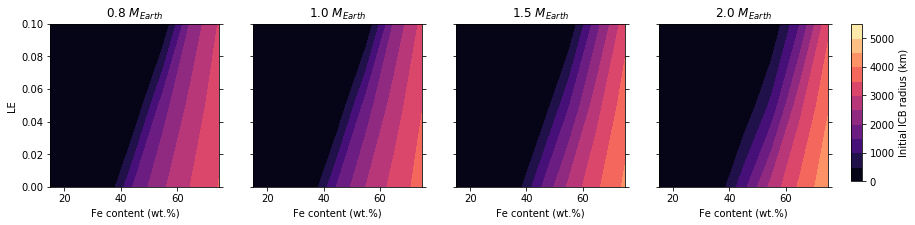

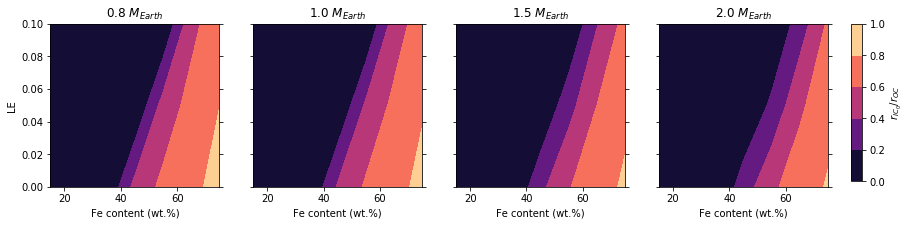

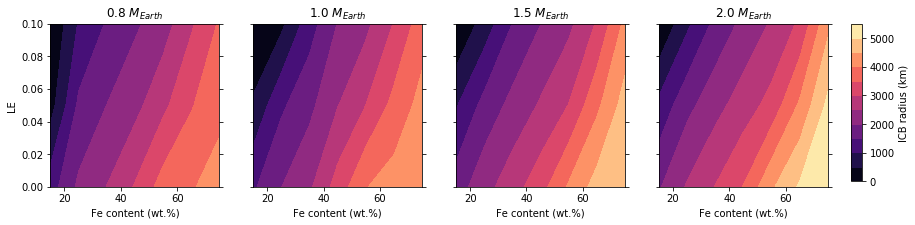

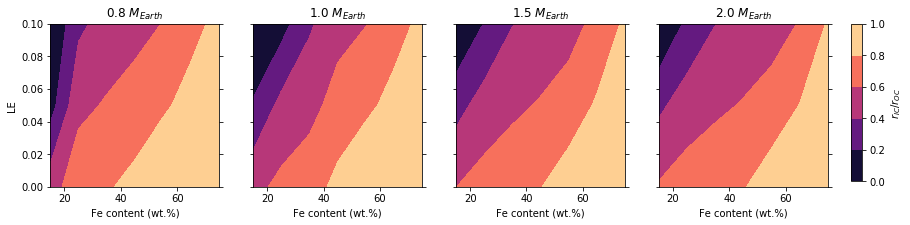

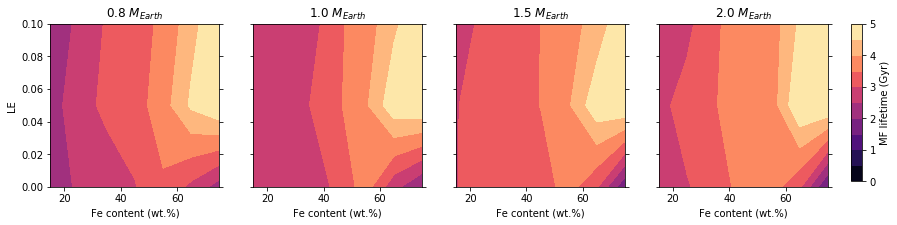

In [20]:
fig, ax = plt.subplots(1, len(Masses_SM), figsize=[16,3],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_rIC = np.linspace(0, 5500, 12)
for i in range(len(Masses_SM)):
    sc = ax[i].contourf(F_SM,M_SM,r_IC_beginning_SM[:,i*len(Fe_SM):len(Fe_SM)*(i+1)],levels_rIC, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("LE")
    ax[i].set_title("{:.1f}".format(Masses_SM[i]) + r" $M_{Earth}$")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Fe content (wt.%)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("Initial ICB radius (km)")
plt.savefig(plots_folder +"r_IC_MpS.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Masses_SM), figsize=[16,3],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_ICMF = np.linspace(0, 1, 6)
for i in range(len(Masses_SM)):
    sc = ax[i].contourf(F_SM,M_SM,r_IC_beginning_SM[:,i*len(Fe_SM):len(Fe_SM)*(i+1)]/r_OC_SM[:,i*len(Fe_SM):len(Fe_SM)*(i+1)],levels_ICMF, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
         ax[i].set_ylabel("LE")
    ax[i].set_title("{:.1f}".format(Masses_SM[i]) + r" $M_{Earth}$")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Fe content (wt.%)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("$r_{IC_{0}}$/$r_{OC}$")
plt.savefig(plots_folder +"ICMF_MpS.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Masses_SM), figsize=[16,3],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_rIC = np.linspace(0, 5500, 12)
for i in range(len(Masses_SM)):
    sc = ax[i].contourf(F_SM,M_SM,r_IC_end_SM[:,i*len(Fe_SM):len(Fe_SM)*(i+1)],levels_rIC, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("LE")
    ax[i].set_title("{:.1f}".format(Masses_SM[i]) + r" $M_{Earth}$")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Fe content (wt.%)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("ICB radius (km)")
plt.savefig(plots_folder +"r_IC_MpS.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Masses_SM), figsize=[16,3],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_ICMF = np.linspace(0, 1, 6)
for i in range(len(Masses_SM)):
    sc = ax[i].contourf(F_SM,M_SM,r_IC_end_SM[:,i*len(Fe_SM):len(Fe_SM)*(i+1)]/r_OC_SM[:,i*len(Fe_SM):len(Fe_SM)*(i+1)],levels_ICMF, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
         ax[i].set_ylabel("LE")
    ax[i].set_title("{:.1f}".format(Masses_SM[i]) + r" $M_{Earth}$")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Fe content (wt.%)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("$r_{IC}$/$r_{OC}$")
plt.savefig(plots_folder +"ICMF_MpS.pdf", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, len(Masses_SM), figsize=[16,3],sharey=True,sharex=True)
plt.subplots_adjust(wspace = 0.2)

levels_MF = np.linspace(0, 5, 11)
for i in range(len(Masses_SM)):
    sc = ax[i].contourf(F_SM,M_SM,MF_lifetime_SM[:,i*len(Fe_SM):len(Fe_SM)*(i+1)],levels_MF, cmap = plt.cm.magma)  
    if i!=0:
        ax[i].set_ylabel("")
    else:
        ax[i].set_ylabel("LE")
    ax[i].set_title("{:.1f}".format(Masses_SM[i]) + r" $M_{Earth}$")
    ax[i].yaxis.set_ticks_position('both')
    ax[i].set_xlabel("Fe content (wt.%)")
    ax[i].yaxis.set_ticks_position('both')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.73])
cb = fig.colorbar(sc, cax=cbar_ax)
cb.set_label("MF lifetime (Gyr)")
plt.savefig(plots_folder +"MF_lifetime_MpS.pdf", bbox_inches="tight")
plt.show()

In [17]:
0.5e13*10e6*3.154e7/(127*8000)  #J / J/K/kg *K

1.5521653543307085e+21

In [15]:
(3e21/1e4) #=4pi r3/3

3e+17

In [16]:
((3e17/1e4)*3/4/np.pi)**(1./3.)

19275.73210407048

In [4]:
M = 4*np.pi*(2456e3)**3/3*1.2e4
M*1.2e3*1e-3/(10e6*3.154e7)/1e13

0.0002833182168778011

In [ ]:
1e-3/10e6/(12000*2456000)    #